<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO PRACTICO LABORATORIO
#### Autor: RICARDO RELOZ


# #Ejercicio:

## Objetivos
### Consolidar los conceptos de teoría moderna mediante la implementación circuital.
### Simular e implementar el filtro con componentes activos de precisión.
### Medir las partes de la función transferencia para frecuencias de 0 a 100 kHz.

## Descripción

### El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo. 
### Las instrucciones pormenorizadas de lo que deberán realizar las encontrarán en el Anexo.

## FILTRO: Chebyshev
### fcorte = 1.5KHz
### fstop = 4.5KHz
### AtMax = 0.5dB
### AtMin = 16dB

## Calculos de transferencia T($)
<img src="./CALCULOS1.jpg" align="left" width="600" /> 
<img src="./CALCULOS2.jpg" align="left" width="600" /> 
<img src="./CALCULOS3.jpg" align="left" width="600" /> 

## Calculos de circuito y valores
### Se nos asigno como Integrado base el UAF42, a simple vista vimos que tenia un circuito pre-armado similar a la TS4 si se lo encaraba por el PIN 3

<img src="./UAF42.jpg" align="left" width="800" /> 

<img src="./CALCULOS4.jpg" align="left" width="600" /> 
<img src="./CALCULOS5.jpg" align="left" width="600" /> 


### Simulacion en SPYDER del filtro CHEBYSHEV

/home/ricardo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


nn 2 - alfa_min_butter 10.367684 - alfa_min_cheby 15.594677
nn 3 - alfa_min_butter 19.540082 - alfa_min_cheby 30.780589
nn 4 - alfa_min_butter 29.039377 - alfa_min_cheby 46.087878
4*w**3 - 3*w


4*w**3 - 3*w

1/(1.95229526883141*w**6 - 2.92844290324712*w**4 + 1.09816608871767*w**2 + 1)
1/(-1.95229526883141*s**6 - 2.92844290324712*s**4 - 1.09816608871767*s**2 + 1)


1/(-1.95229526883141*s**6 - 2.92844290324712*s**4 - 1.09816608871767*s**2 + 1)

[-31.2367243   -0.         -78.09181075  -0.         -68.33033441
  -0.         -24.40369086  -0.          -3.05046136  -0.
   1.        ]
[-0.11196292+1.01155737j -0.11196292-1.01155737j  0.11196292+1.01155737j
  0.11196292-1.01155737j -0.29312273+0.62517684j -0.29312273-0.62517684j
  0.29312273+0.62517684j  0.29312273-0.62517684j -0.36231962+0.j
  0.36231962+0.j        ]
[-0.11196292+1.01155737j -0.11196292-1.01155737j -0.29312273+0.62517684j
 -0.29312273-0.62517684j -0.36231962+0.j        ]


#### Cheby_ord_3_rip_0.5_att_16

<IPython.core.display.Math object>

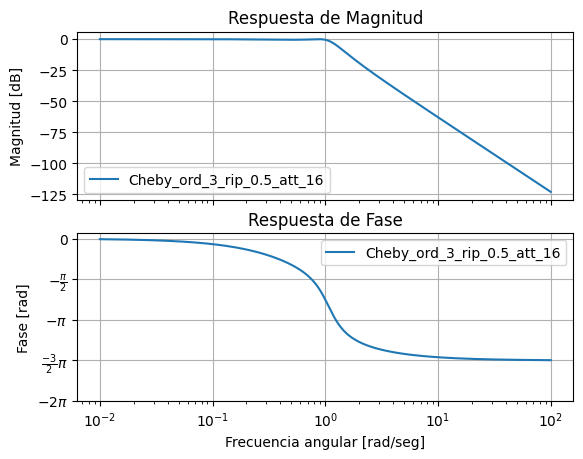

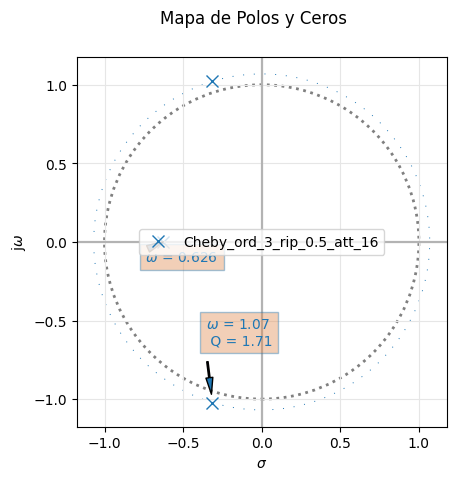

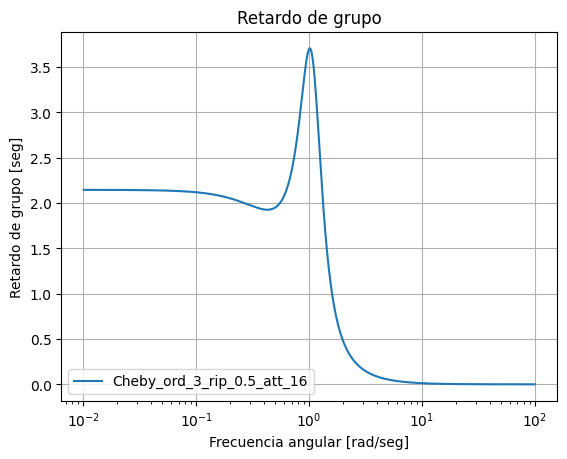

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp
from IPython.display import display

#%% datos del problema

alfa_max = 0.5 # dB
alfa_min = 16 # dB
ws = 3

#%% cuentas auxiliares

# epsilon cuadrado
eps_sq = 10**(alfa_max/10)-1
eps = np.sqrt(eps_sq)

for nn in range(2,5):
    
    alfa_min_c = 10*np.log10(1 + eps_sq * np.cosh(nn * np.arccosh(ws))**2 )
    # print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_c) )

    alfa_min_b = 10*np.log10(1 + eps_sq * ws**(2*nn))
    print( 'nn {:d} - alfa_min_butter {:f} - alfa_min_cheby {:f}'.format(nn, alfa_min_b, alfa_min_c) )

    # repasar décadas y octavas!!
    # 20*np.log10([1, 2, 4, 8, 16])
    # 20*np.log10([1, 10, 100, 1000])    

#%% elijo un orden luego de iterar ...

nn = 3

#%% forma simbólica la más natural viniendo desde el lápiz y papel

chebn_expr = Chebyshev_polynomials(nn)

print(sp.expand(chebn_expr))
display(sp.expand(chebn_expr))
# preguntar si pueden visualizar LaTex, sino usar print

#
Tcsq_jw = 1/(1 + eps_sq*chebn_expr**2 )
print(sp.expand(Tcsq_jw))
# display(sp.expand(Tcsq_jw))

j = sp.I

Tcsq_s = Tcsq_jw.subs(w, s/j)
print(sp.expand(Tcsq_s))
display(sp.expand(Tcsq_s))


#%% forma numérica. mucho menos clara

# asumo que hice la recursión en papel
Cn3 = np.array([16., 0., -20., 0., 5., 0])
Cn3sq = np.polymul( Cn3, Cn3)
Tcsq_den_jw = np.polyadd( np.array([1.]), Cn3sq * eps_sq ) 

# convierto a s
Tcsq_den_s = Tcsq_den_jw * np.array([-1,-1,1,-1,-1,-1,1,-1,-1,-1,1])
print(Tcsq_den_s)

roots_Tcsq_den_s = np.roots(Tcsq_den_s)
print(roots_Tcsq_den_s)

# filtro T(s) reteniendo solo polos en el SPI
roots_Tcsq_den_s = roots_Tcsq_den_s[np.real(roots_Tcsq_den_s) < 0]
print(roots_Tcsq_den_s)

z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

#%% análisis de lo obtenido

filter_names = []
all_sys = []

this_aprox = 'Cheby'
this_label = this_aprox + '_ord_' + str(nn) + '_rip_' + str(alfa_max) + '_att_' + str(alfa_min)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

filter_names.append(this_label)
all_sys.append(sig.TransferFunction(num_cheb, den_cheb))

analyze_sys( all_sys, filter_names )

print_subtitle(this_label)
# factorizamos en SOS's
pretty_print_SOS(sos_cheb, mode='omegayq')



In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sympy as sp

from sympy import symbols, Matrix
from sympy import init_printing

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex

init_printing()  # Inicializa la impresión en Jupyter

# T puenteado cargado: red de R constante
# explicación:
'''    
+ Numeramos los polos de 0 a n=3

  
    0----Ya----+---Yc---|
               |        |
              Yb        G
               |        |
    1----------+---------
    
'''    

Ya, Yb, Yc = sp.symbols('Ya Yb Yc', complex=True)
G = sp.symbols('G', real=True, positive=True)

input_port = [1, 0]
output_port = [3, 0]

# Armo la MAI

#               Nodos: 0      1        2        3
Ymai = sp.Matrix([  
                    [ Yb+G,     0,      -Yb,        -G],
                    [ 0,        Ya,     -Ya,        0],
                    [ -Yb,      -Ya,    Ya+Yb+Yc,   -Yc],
                    [ -G,       0,      -Yc,        G+Yc]
                 ])

con_detalles = False
# con_detalles = True

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, output_port[0], output_port[1], input_port[0], input_port[1], verbose=con_detalles)

print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(output_port[0], output_port[1], input_port[0], input_port[1]) +  sp.latex(Vmai) )

Vmai_sym = sp.simplify(Vmai.subs(Yc, 3*Ya))

Vmai_sym = sp.simplify(Vmai_sym.subs(G, 1))

Vmai_sym = sp.simplify(Vmai_sym.subs(1/(Ya*Yb), 9/8))

print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(output_port[0], output_port[1], input_port[0], input_port[1]) +  sp.latex(Vmai_sym) )

Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## SIMULACION LTSPICE
### Circuito
### En el circuito se puede ver que el filtro cumple a los requisitos por parte del trabajo practico, los componentes con mayusculas serian los componentes exteriores al UAF42
<img src="./LTSPICE.png" align="left" width="900" /> 

### Grafico de respuesta en frecuencia
<img src="./Grafico1.png" align="left" width="900" /> 
<img src="./Grafico2.png" align="left" width="900" /> 

## DISEÑO DE ESQUEMATICO Y PCB
### Para realizar el filtro a la vida real se uso el programa KICAD para realizar el esquematico, se puede ver por parte de la imagen, que todas las resistencias tienen asociado un PRESET, esta misma es para realizar el ajuste fino debido a que no hay valores comerciales para las resistencias.
Anexo, en la plaqueta se ve que tiene una placa asociada, es debido a que la version de KICAD no tenia los PRESET con las mediciones aptas, entonces al no poder ingresar pero la placa ya hecha, se opto por colocar una placa adaptadora para los PRESET en base a una experimental. Aun asi se respetaron los cambios a futuro en caso de reutilizar el UAF42.
<img src="./Esquematico.png" align="left" width="900" /> 
<img src="./PCB.png" align="left" width="900" /> 
<img src="./PLAQUETA.jpg" align="left" width="900" /> 

## TESTEO Y PUESTA A PRUEBA REAL
Las borneras de la plaqueta hacian de entrada y salida de señal, mientras que la bornera central de 3, se encargaba la alimentacion
### Concepto de conexion
<img src="./TESTEO.png" align="left" width="900" /> 

### Algunas mediciones con el osciloscopio en respuesta a frecuencia
<img src="./IMG2.jpg" align="left" width="400" /> 
<img src="./IMG4.jpg" align="left" width="400" /> 
<img src="./IMG6.jpg" align="left" width="400" /> 

### Luego se hizo la medicion en un analizador de audio U8903A para realizar las mediciones y caracterizacion de las señales de audio, permitia ver un respuesta en frecuencia de modo espectral
<img src="./IMG5.jpg" align="left" width="600" /> 
<img src="./IMG3.jpg" align="left" width="600" /> 

## TABLAS Y RESULTADO
### Por parte del osciloscopio sacamos con varias frecuencias de prueba, sus respectiva ganancia y retardos con cruce por cero o diferencia de tiempo entre los picos, y luego graficamos los resultados en escala logaritmica.
En los graficos se puede ver un punto verde y negro, serian respectivamente el punto del grafico de las frecuencias de corte y stop. Se puede ver que se aproxima a los valores simulados, si tomamos en cuenta la tolerancia de los componentes.
<img src="./Tablas1.jpg" align="left" width="1000" /> 
<img src="./Tablas2.jpg" align="left" width="600" /> 
<img src="./Tablas3.jpg" align="left" width="600" /> 


### Por parte del analizador del audio, pudimos hacer un barrido de frecuencia que permitia una mayor cantidad de muestras en menor tiempo.
Las tablas que muestran son:
Frecuencia vs. Frecuencia: permite verificar si las frecuencias de entrada y salida coinciden, garantizando que no haya distorsión de frecuencia.
Fase vs. Frecuencia: asegura que las señales a diferentes frecuencias estén alineadas temporalmente, evitando problemas de desincronización y manteniendo la claridad y coherencia del audio. En esta misma se presenta un comportamiento que a frecuencias altas la fase varia de forma abrupta, puede ser resultado de la complejidad del sistema y su respuesta a las frecuencias medidas. Estos patrones pueden indicar la presencia de resonancias, efectos de retroalimentación, o comportamientos de fase no lineales. 
VAC vs. Frecuencia: verifica la uniformidad en la respuesta en amplitud, asegurando que el sistema no amplifique ni atenúe frecuencias de manera desigual.
<img src="./Tablas4.jpg" align="left" width="700" /> 
<img src="./AUDIO.png" align="left" width="500" /> 
<img src="./Tablas5.jpg" align="left" width="600" /> 
<img src="./Tablas6.jpg" align="left" width="600" /> 
<img src="./Tablas7.jpg" align="left" width="600" /> 
<img src="./Tablas8.jpg" align="left" width="600" /> 


## Conclusiones y Reflexiones
El diseño y la implementación del filtro pasabajos Chebyshev se realizaron con precisión, logrando una atenuación eficiente de las frecuencias superiores a la frecuencia de corte especificada, mientras se mantiene una respuesta en frecuencia adecuada dentro de la banda de paso. Aunque las atenuaciones medidas no coincidieron exactamente con las esperadas teóricamente, los resultados obtenidos están dentro de un rango aceptable y se aproximan a las especificaciones de diseño. Las pruebas confirmaron que el filtro opera según las características esperadas, con desviaciones menores atribuibles a las tolerancias de los componentes y las variaciones en la construcción.